### This program provides us the range of salary of the individual according to the following features
#### Input
```
1. Age
2. Education Level (High School =1, Bachelor=2, Master's=3 , Phd=4)
3. Years of Experience 
4. Annual Working Hours
5. 
```
### Output
```
Salary Category (Low=0, medium=1, high=2)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:

# Load the dataset
file_path = "synthetic_dataset.csv"  # Update with actual file path if necessary
df = pd.read_csv(file_path)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Age                   150 non-null    int64
 1   Education Level       150 non-null    int64
 2   Years of Experience   150 non-null    int64
 3   Annual Working Hours  150 non-null    int64
 4   Salary Category       150 non-null    int64
dtypes: int64(5)
memory usage: 6.0 KB


In [4]:
df.head()

,Age,Education Level,Years of Experience,Annual Working Hours,Salary Category
0,58,2,19,1575,1
1,48,1,23,1653,0
2,34,1,32,2155,0
3,27,1,23,1934,0
4,40,3,10,2496,1


In [5]:
df.tail()

,Age,Education Level,Years of Experience,Annual Working Hours,Salary Category
145,49,3,38,1518,2
146,30,3,4,1676,0
147,47,4,21,2111,2
148,44,4,28,1895,2
149,58,3,2,1944,0


In [6]:
df.describe()

,Age,Education Level,Years of Experience,Annual Working Hours,Salary Category
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,39.913333,2.586667,21.486667,2018.486667,1.020000
std,11.751302,1.159650,11.409249,286.604391,0.847182
min,20.000000,1.000000,0.000000,1511.000000,0.000000
25%,30.000000,1.250000,13.250000,1776.500000,0.000000
50%,41.000000,3.000000,23.000000,2034.000000,1.000000
75%,49.000000,4.000000,31.750000,2257.750000,2.000000
max,59.000000,4.000000,39.000000,2498.000000,2.000000


In [7]:
df.shape

(150, 5)

In [8]:

# Split data into features and target
X = df.drop(columns=["Salary Category"])
y = df["Salary Category"]
print(f"Shape of X= {X.shape}")
print(f"Shape of X= {y.shape}")


Shape of X= (150, 4)
Shape of X= (150,)


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
import pickle

ModuleNotFoundError: No module named 'sklearn'

In [10]:


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
## To find the shape 
print(f"Shape of X_train= {X_train.shape}")
print(f"Shape of X_test= {X_test.shape}")
print(f"Shape of y_train= {y_train.shape}")
print(f"Shape of y_test= {y_test.shape}")

Shape of X_train= (120, 4)
Shape of X_test= (30, 4)
Shape of y_train= (120,)
Shape of y_test= (30,)


In [ ]:
# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [13]:



# Test the model
y_out = model.predict(X_test)
accuracy = accuracy_score(y_true=y_test, y_pred=y_out)
print(f"Model Accuracy: {accuracy * 100:.2f}%")



Model Accuracy: 93.33%


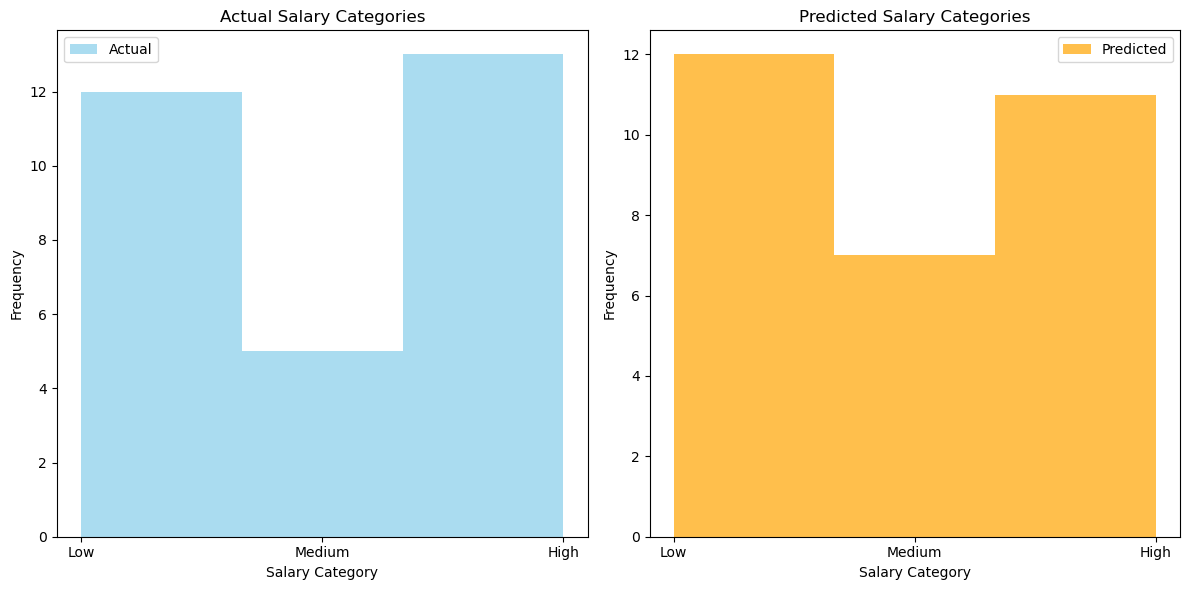

In [ ]:
# Histogram of Actual vs Predicted
plt.figure(figsize=(12, 6))

# Actual Data Histogram
plt.subplot(1, 2, 1)
plt.hist(y_test, bins=3, color='skyblue', alpha=0.7, label='Actual')
plt.title('Actual Salary Categories')
plt.xlabel('Salary Category')
plt.ylabel('Frequency')
plt.xticks([0, 1, 2], ['Low', 'Medium', 'High'])
plt.legend()

# Predicted Data Histogram
plt.subplot(1, 2, 2)
plt.hist(y_out, bins=3, color='orange', alpha=0.7, label='Predicted')
plt.title('Predicted Salary Categories')
plt.xlabel('Salary Category')
plt.ylabel('Frequency')
plt.xticks([0, 1, 2], ['Low', 'Medium', 'High'])
plt.legend()

plt.tight_layout()
plt.show()

In [15]:
# # Accuracy Bar Chart
# plt.figure(figsize=(6, 6))
# plt.bar(["Accuracy"], [accuracy * 100], color='green', alpha=0.7)
# plt.ylim(0, 100)
# plt.title('Model Accuracy')
# plt.ylabel('Accuracy (%)')
# plt.show()


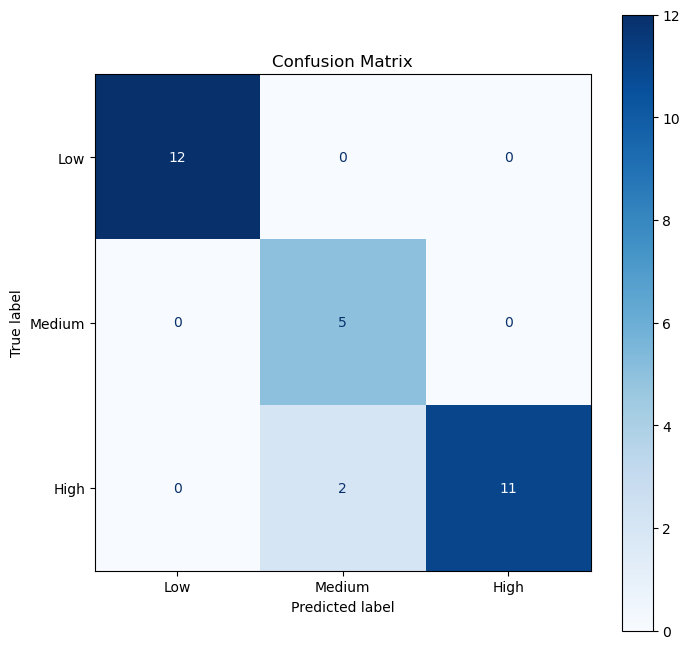

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_out)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Low", "Medium", "High"])

# Plot Confusion Matrix
plt.figure(figsize=(8, 8))
disp.plot(cmap='Blues', ax=plt.gca())
plt.title("Confusion Matrix")
plt.show()


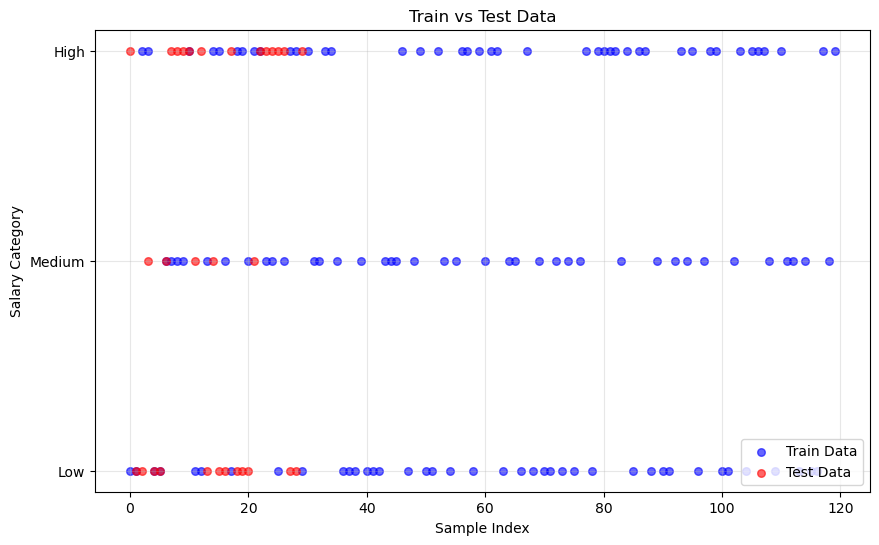

In [ ]:
import matplotlib.pyplot as plt

# Visualizing Train vs Test Data
plt.figure(figsize=(10, 6))

# Scatter plot for training data
plt.scatter(range(len(y_train)), y_train, color='blue', alpha=0.6, label='Train Data', s=30)

# Scatter plot for testing data
plt.scatter(range(len(y_test)), y_test, color='red', alpha=0.6, label='Test Data', s=30)

# Plot settings
plt.title('Train vs Test Data')
plt.xlabel('Sample Index')
plt.ylabel('Salary Category')
plt.yticks([0, 1, 2], ['Low', 'Medium', 'High'])
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [18]:
# def plot_data(X_train=X_train,y_train=y_train, X_test=X_test, y_test=y_test, predictions=None):
#         plt.figure(figsize=(8,6))
#         plt.scatter(X_train, y_train, c="b", s=10, label="Training Data")
#         plt.scatter(X_test, y_test, c="r", s=10, label="Testing  Data")

#         if predictions is not None:
#             plt.scatter(X_test, predictions, c="g", s=10, lable="Predicted Data")

#         plt.xlabel("X")
#         plt.ylabel("Y")
#         plt.legend()
#         plt.title("Scatter Plot of X and Y")

In [19]:
# plot_data()

In [20]:

# Save the trained model
model_filename = "salary_category_model.pkl"
with open(model_filename, "wb") as file:
    pickle.dump(model, file)
print(f"Model saved as {model_filename}.")
    

Model saved as salary_category_model.pkl.


In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)